Test notebook to know how to process pointnet data (padding and apply transforms).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from contrastive.backbones.pointnet import PointNetCls
from torch.nn.utils.rnn import pack_padded_sequence
from torchsummary import summary

In [3]:
data = np.load("/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/2mm/CINGULATE/mask/Rskeleton.npy")
data.shape

(1114, 17, 40, 38, 1)

In [3]:
print(np.product(data.shape))
points = np.nonzero(data)
for coord in points:
    print(len(coord)) # should always be the same

points

8811440
258607
258607
258607
258607
258607


(array([  0,   0,   0, ..., 340, 340, 340]),
 array([ 1,  2,  2, ..., 13, 13, 13]),
 array([15, 11, 11, ...,  8,  9, 10]),
 array([19, 15, 16, ..., 27, 26, 34]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [4]:
clouds = []

for i in range(data.shape[0]): # loop over batch elements
    point_cloud = np.array(data[i].nonzero()[:3])
    clouds.append(point_cloud)

clouds[0].shape, clouds[1].shape 

((3, 833), (3, 794))

n_max = 1099


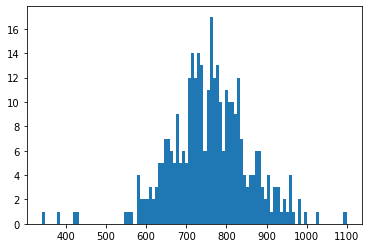

In [5]:
lengths = []

for point_cloud in clouds:
    #print(len(point_cloud), len(point_cloud[0]))
    lengths.append(point_cloud.shape[1])

print("n_max =", np.max(lengths))
plt.hist(lengths, bins=100)
plt.show()

In [25]:
points = [point_cloud for i in range(10)]
points = np.array(points)

semi_points = [point_cloud[:,:500] for i in range(10)]
semi_points = np.array(semi_points)

points.shape, semi_points.shape

((10, 3, 893), (10, 3, 500))

In [8]:
X = torch.from_numpy(points).type(torch.FloatTensor)
semi_X = torch.from_numpy(semi_points).type(torch.FloatTensor)
X, semi_X

(tensor([[[ 1.,  1.,  1.,  ..., 13., 13., 13.],
          [26., 26., 29.,  ..., 11., 12., 12.],
          [ 9., 10.,  8.,  ..., 33., 29., 30.]],
 
         [[ 1.,  1.,  1.,  ..., 13., 13., 13.],
          [26., 26., 29.,  ..., 11., 12., 12.],
          [ 9., 10.,  8.,  ..., 33., 29., 30.]],
 
         [[ 1.,  1.,  1.,  ..., 13., 13., 13.],
          [26., 26., 29.,  ..., 11., 12., 12.],
          [ 9., 10.,  8.,  ..., 33., 29., 30.]],
 
         ...,
 
         [[ 1.,  1.,  1.,  ..., 13., 13., 13.],
          [26., 26., 29.,  ..., 11., 12., 12.],
          [ 9., 10.,  8.,  ..., 33., 29., 30.]],
 
         [[ 1.,  1.,  1.,  ..., 13., 13., 13.],
          [26., 26., 29.,  ..., 11., 12., 12.],
          [ 9., 10.,  8.,  ..., 33., 29., 30.]],
 
         [[ 1.,  1.,  1.,  ..., 13., 13., 13.],
          [26., 26., 29.,  ..., 11., 12., 12.],
          [ 9., 10.,  8.,  ..., 33., 29., 30.]]]),
 tensor([[[ 1.,  1.,  1.,  ..., 10., 10., 10.],
          [26., 26., 29.,  ...,  4.,  4.,  4.],
      

In [9]:
net = PointNetCls(k=4)
net.eval()

summary(net)

Y, trans, trans_feat = net.forward(X)

print(X.shape, Y.shape)
Y

Layer (type:depth-idx)                   Param #
├─PointNetfeat: 1-1                      --
|    └─STN3d: 2-1                        --
|    |    └─Conv1d: 3-1                  256
|    |    └─Conv1d: 3-2                  8,320
|    |    └─Conv1d: 3-3                  132,096
|    |    └─Linear: 3-4                  524,800
|    |    └─Linear: 3-5                  131,328
|    |    └─Linear: 3-6                  2,313
|    |    └─ReLU: 3-7                    --
|    |    └─BatchNorm1d: 3-8             128
|    |    └─BatchNorm1d: 3-9             256
|    |    └─BatchNorm1d: 3-10            2,048
|    |    └─BatchNorm1d: 3-11            1,024
|    |    └─BatchNorm1d: 3-12            512
|    └─Conv1d: 2-2                       256
|    └─Conv1d: 2-3                       8,320
|    └─Conv1d: 2-4                       132,096
|    └─BatchNorm1d: 2-5                  128
|    └─BatchNorm1d: 2-6                  256
|    └─BatchNorm1d: 2-7                  2,048
├─Linear: 1-2             

tensor([[-0.6124,  0.4781,  0.3671,  0.2920],
        [-0.6124,  0.4781,  0.3671,  0.2920],
        [-0.6124,  0.4781,  0.3671,  0.2920],
        [-0.6124,  0.4781,  0.3671,  0.2920],
        [-0.6124,  0.4781,  0.3671,  0.2920],
        [-0.6124,  0.4781,  0.3671,  0.2920],
        [-0.6124,  0.4781,  0.3671,  0.2920],
        [-0.6124,  0.4781,  0.3671,  0.2920],
        [-0.6124,  0.4781,  0.3671,  0.2920],
        [-0.6124,  0.4781,  0.3671,  0.2920]], grad_fn=<AddmmBackward0>)

In [10]:
#net = PointNetCls(k=4)
#net.eval()

semi_Y, trans, trans_feat = net.forward(semi_X)

print(semi_X.shape, semi_Y.shape)
semi_Y

torch.Size([10, 3, 500]) torch.Size([10, 4])


tensor([[-0.6122,  0.4785,  0.3655,  0.2901],
        [-0.6122,  0.4785,  0.3655,  0.2901],
        [-0.6122,  0.4785,  0.3655,  0.2901],
        [-0.6122,  0.4785,  0.3655,  0.2901],
        [-0.6122,  0.4785,  0.3655,  0.2901],
        [-0.6122,  0.4785,  0.3655,  0.2901],
        [-0.6122,  0.4785,  0.3655,  0.2901],
        [-0.6122,  0.4785,  0.3655,  0.2901],
        [-0.6122,  0.4785,  0.3655,  0.2901],
        [-0.6122,  0.4785,  0.3655,  0.2901]], grad_fn=<AddmmBackward0>)

## accept point clouds with different sizes

See https://github.com/charlesq34/pointnet/issues/161

## Padding

In [11]:
def zero_padding(cloud, n_max, shuffle=False):
    return np.pad(cloud, ((0,0),(0,n_max-cloud.shape[1])))

zero_padding(clouds[0], 1080).shape

(3, 1080)

In [12]:
def repeat_padding(cloud, n_max, replace=False):
    while n_max - cloud.shape[1] > 0: # loop in case len(cloud) < n_max/2
        n = min(n_max - cloud.shape[1], cloud.shape[1])
        if n < 0:
            raise ValueError("the vector is too long compared to the desired vector size")
        
        idx = np.random.choice(cloud.shape[1], size=n, replace=replace)
        padded_part = cloud[:, idx]

        cloud = np.concatenate([cloud, padded_part], axis=1)
    
    return cloud

repeat_padding(clouds[0], 1080).shape

(3, 1080)

In [67]:
def pad(clouds, padding_method=zero_padding, n_max=None):
    if not n_max:
        n_max = np.max([clouds[i].shape[1] for i in range(len(clouds))]) # max length of a sequence
    padded_clouds = np.array([padding_method(cloud, n_max) for cloud in clouds])
    return padded_clouds

In [68]:
z_padded_clouds = pad(clouds[:10], padding_method=zero_padding)
r_padded_clouds = pad(clouds, padding_method=repeat_padding)

z_padded_clouds.shape, r_padded_clouds.shape

((10, 3, 912), (1114, 3, 1080))

In [26]:
z_padded_clouds[:10]

array([[[ 1,  1,  1, ...,  0,  0,  0],
        [ 7,  8,  9, ...,  0,  0,  0],
        [23, 23, 22, ...,  0,  0,  0]],

       [[ 1,  1,  1, ...,  0,  0,  0],
        [ 7, 13, 13, ...,  0,  0,  0],
        [27, 16, 17, ...,  0,  0,  0]],

       [[ 1,  2,  2, ...,  0,  0,  0],
        [ 6,  5,  5, ...,  0,  0,  0],
        [25, 23, 24, ...,  0,  0,  0]],

       ...,

       [[ 1,  1,  1, ...,  0,  0,  0],
        [10, 10, 11, ...,  0,  0,  0],
        [20, 21, 19, ...,  0,  0,  0]],

       [[ 3,  3,  3, ...,  0,  0,  0],
        [ 3,  9, 10, ...,  0,  0,  0],
        [24, 15, 14, ...,  0,  0,  0]],

       [[ 1,  2,  2, ...,  0,  0,  0],
        [11,  9,  9, ...,  0,  0,  0],
        [19, 19, 20, ...,  0,  0,  0]]])

In [22]:
z_padded_X = torch.from_numpy(z_padded_clouds).type(torch.FloatTensor)
r_padded_X = torch.from_numpy(r_padded_clouds).type(torch.FloatTensor)
z_padded_X.shape

torch.Size([1114, 3, 1080])

In [23]:
z_Y, _, _ = net.forward(z_padded_X[:10])
r_Y, _, _ = net.forward(r_padded_X[:10])
print(z_Y)
print(r_Y)

tensor([[-0.6166,  0.4821,  0.3638,  0.2842],
        [-0.6140,  0.4804,  0.3583,  0.2798],
        [-0.6168,  0.4817,  0.3642,  0.2846],
        [-0.6150,  0.4796,  0.3643,  0.2864],
        [-0.6104,  0.4754,  0.3635,  0.2895],
        [-0.6120,  0.4771,  0.3627,  0.2872],
        [-0.6124,  0.4771,  0.3626,  0.2866],
        [-0.6155,  0.4799,  0.3623,  0.2836],
        [-0.6126,  0.4775,  0.3628,  0.2867],
        [-0.6123,  0.4772,  0.3620,  0.2860]], grad_fn=<AddmmBackward0>)
tensor([[-0.6158,  0.4816,  0.3678,  0.2896],
        [-0.6148,  0.4812,  0.3620,  0.2835],
        [-0.6156,  0.4806,  0.3677,  0.2899],
        [-0.6145,  0.4795,  0.3685,  0.2917],
        [-0.6096,  0.4755,  0.3671,  0.2945],
        [-0.6117,  0.4775,  0.3662,  0.2914],
        [-0.6133,  0.4784,  0.3667,  0.2908],
        [-0.6153,  0.4802,  0.3659,  0.2878],
        [-0.6120,  0.4776,  0.3667,  0.2919],
        [-0.6124,  0.4780,  0.3652,  0.2897]], grad_fn=<AddmmBackward0>)


In [41]:
for cloud in clouds[:10]:
    cloud = torch.from_numpy(cloud).type(torch.FloatTensor)
    cloud = cloud[None,:,:]  # add a dimension
    #print(cloud.shape)
    print(net.forward(cloud)[0])

tensor([[-0.6158,  0.4816,  0.3678,  0.2896]], grad_fn=<AddmmBackward0>)
tensor([[-0.6148,  0.4812,  0.3620,  0.2835]], grad_fn=<AddmmBackward0>)
tensor([[-0.6156,  0.4806,  0.3677,  0.2899]], grad_fn=<AddmmBackward0>)
tensor([[-0.6145,  0.4795,  0.3685,  0.2917]], grad_fn=<AddmmBackward0>)
tensor([[-0.6096,  0.4755,  0.3671,  0.2945]], grad_fn=<AddmmBackward0>)
tensor([[-0.6117,  0.4775,  0.3662,  0.2914]], grad_fn=<AddmmBackward0>)
tensor([[-0.6133,  0.4784,  0.3667,  0.2908]], grad_fn=<AddmmBackward0>)
tensor([[-0.6153,  0.4802,  0.3659,  0.2878]], grad_fn=<AddmmBackward0>)
tensor([[-0.6120,  0.4776,  0.3667,  0.2919]], grad_fn=<AddmmBackward0>)
tensor([[-0.6124,  0.4780,  0.3652,  0.2897]], grad_fn=<AddmmBackward0>)


## Conversion transform for pointnet

Inspired from augmentations.py

In [79]:
class ToPointnetTensor(object):

    def __init__(self, padding_method=repeat_padding, n_max=None):
        self.padding_method = padding_method
        self.n_max = n_max

    def __call__(self, tensor):
        arr = tensor.numpy()

        clouds = []
        for i in range(arr.shape[0]): # loop over batch elements
            point_cloud = np.array(arr[i].nonzero()[:3])
            print(point_cloud.shape)
            clouds.append(point_cloud)
        
        padded_clouds = pad(clouds, padding_method=self.padding_method, n_max=self.n_max)
        
        return torch.from_numpy(padded_clouds)

In [80]:
convertisseur = ToPointnetTensor(n_max=None)

X = torch.from_numpy(data[:20])
print(X.size())

convertisseur(X).shape

torch.Size([20, 17, 40, 38, 1])
(3, 912)
(3, 711)
(3, 799)
(3, 702)
(3, 636)
(3, 659)
(3, 775)
(3, 897)
(3, 836)
(3, 767)
(3, 874)
(3, 906)
(3, 923)
(3, 721)
(3, 803)
(3, 609)
(3, 854)
(3, 844)
(3, 870)
(3, 677)


torch.Size([20, 3, 923])

In [83]:
torch.nonzero(X, as_tuple=False).shape

torch.Size([15775, 5])

In [71]:
for i in range(20):
    print(np.array(data[i].nonzero()[:3]).shape)

(3, 912)
(3, 711)
(3, 799)
(3, 702)
(3, 636)
(3, 659)
(3, 775)
(3, 897)
(3, 836)
(3, 767)
(3, 874)
(3, 906)
(3, 923)
(3, 721)
(3, 803)
(3, 609)
(3, 854)
(3, 844)
(3, 870)
(3, 677)


## Contrastive Dataset

In [86]:
from contrastive.data.transforms import transform_no_foldlabel
from contrastive.data.datasets import ContrastiveDataset
import yaml

In [88]:
with open("/neurospin/dico/agaudin/Runs/04_pointnet/Output/2022-08-04/15-21-29/.hydra/config.yaml", 'r') as file:    
    config = yaml.load(file, Loader=yaml.BaseLoader)
config

{'checkpoint_dir': '../../Output',
 'pickle_normal': '/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/2mm/CINGULATE/mask/Rskeleton.pkl',
 'numpy_all': '/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/2mm/CINGULATE/mask/Rskeleton.npy',
 'subjects_all': '/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/2mm/CINGULATE/mask/Rskeleton_subject.csv',
 'foldlabel_all': '/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/2mm/CINGULATE/mask/Rlabel.npy',
 'subjects_foldlabel_all': '/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/2mm/CINGULATE/mask/Rlabel_subject.csv',
 'pickle_benchmark': 'null',
 'train_val_csv_file': '/neurospin/dico/data/deep_folding/papers/midl2022/HCP_half_1bis.csv',
 'nb_subjects': '-1',
 'model': 'SimCLR',
 'with_labels': 'false',
 'input_size': '(1, 17, 40, 38)',
 'temperature_initial': '0.5',
 'temperature': '0.5',
 'sigma': '5',
 'drop_rate': '0.15',
 'depth_decoder': '3',
 'test': 'false',
 'mode': 'encoder',


In [89]:
transform_no_foldlabel(True, config)

AttributeError: 'dict' object has no attribute 'backbone_name'